# Tutorial

In this tutorial, we will take a PBMC dataset captured by CITE-Seq as an example to illustrate the functions of GFPA.

In [1]:
import scanpy as sc
import gfpa
import matplotlib.pyplot as plt
import numpy as np
from skbio.stats.composition import clr

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Load a PBMC dataset.

In [3]:
pbmc = sc.read_h5ad("/home/hh/bigdata/hh/GFPA/test_pbmc.h5ad")

In [4]:
pbmc = gfpa.tl.separate_out_protein_expression(pbmc, protein_prefix="AB_", set_protein_obsm_name="protein_expression", layers="raw")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11864/11864 [00:00<00:00, 712921.71it/s]


CD4 cells were extracted from PBMC dataset. P. S. This step is optional. The gfpa can also analyze the entire PBMC dataset.

In [5]:
pbmc_cd4 = gfpa.tl.celldata(pbmc, obs="initial_clustering", sp_obs="CD4")

🍪 729 cells are extracted.


The gfpa needs to standardize the RNA data. Please do not input normalized RNA data to gfpa.

In [6]:
gfpa.pp.rna_normalization(pbmc_cd4, layers="raw")

🫘 11735 types of genes are normalized.


The gfpa needs to standardize the RNA data. Please do not input normalized protein data to gfpa. Note: You need to specify the location of the protein data.

In [7]:
gfpa.pp.protein_normalization(pbmc_cd4, protein_obsm="protein_expression")

🥚 129 types of proteins are normalized.


The gfpa needs to specify a *. gmt file. These *. gmt files will be converted into gene function data sets by gfpa. You can download these files at the following address: https://www.gsea-msigdb.org/gsea/msigdb/index.jsp

In [8]:
gfpa.tl.geneset(pbmc_cd4, gmt_filepath="h.all.v2022.1.Hs.symbols.gmt")

🍽 Reading functional gene collection.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60804.64it/s]

🥗 50 functional gene collections are extracted.


The time to calculate gfpa depends on the size of cell subtype data set and gene function data set

In [9]:
gfpa.tl.scores(pbmc_cd4)

🙂 GFPA scores are being calculated.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:08<00:00,  5.94it/s]


🍱 Organizing results.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.71it/s]


👀 Adjust p value.


The gfpa can be saved as a *. csv file.

In [10]:
gfpa.tl.to_csv(pbmc_cd4, filepath="pbmc_cd4_gfpa.csv")

💾 The GFPA has been saved to pbmc_cd4_gfpa.csv


You can use the following functions to quickly preview the gfpa score.

In [11]:
gfpa.tb.top(pbmc_cd4, n=10)

🧐 The p value was adjusted by Benjamin/Hochberg independence test.
🤔 adj_p_value < 0.01 and GFPA_score > 0.664430 are considered reliable.


,geneset,protein,correlation,p_value,adj_p_value,reliable,GFPA_score,adj_GFPA_score
0,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,AB_CD99,0.633045,6.767078e-83,4.364765e-79,True,0.775294,0.775294
1,HALLMARK_HYPOXIA,AB_CD99,0.575999,1.171671e-65,3.778637e-62,True,0.730964,0.730964
2,HALLMARK_APOPTOSIS,AB_CD99,0.556475,1.670011e-60,3.590524e-57,True,0.715045,0.715045
3,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,AB_CD2,0.541618,8.349973e-57,1.346433e-53,True,0.702662,0.702662
4,HALLMARK_INTERFERON_GAMMA_RESPONSE,AB_CD99,0.530313,4.120387e-54,5.315299e-51,True,0.693078,0.693078
5,HALLMARK_TNFA_SIGNALING_VIA_NFKB,AB_CD99,0.524774,7.903330e-53,8.496080e-50,True,0.688331,0.688331
6,HALLMARK_INFLAMMATORY_RESPONSE,AB_CD99,0.520024,9.534428e-52,8.785295e-49,True,0.684231,0.684231
7,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,AB_FAS,0.514998,1.273680e-50,1.026905e-47,True,0.679867,0.679867
8,HALLMARK_COMPLEMENT,AB_CD99,0.511881,6.223202e-50,4.459962e-47,True,0.677144,0.677144
9,HALLMARK_COMPLEMENT,AB_CD2,0.510832,1.057167e-49,6.818725e-47,True,0.676226,0.676226


You can use the following functions to quickly view the correlation between gene sets and proteins.

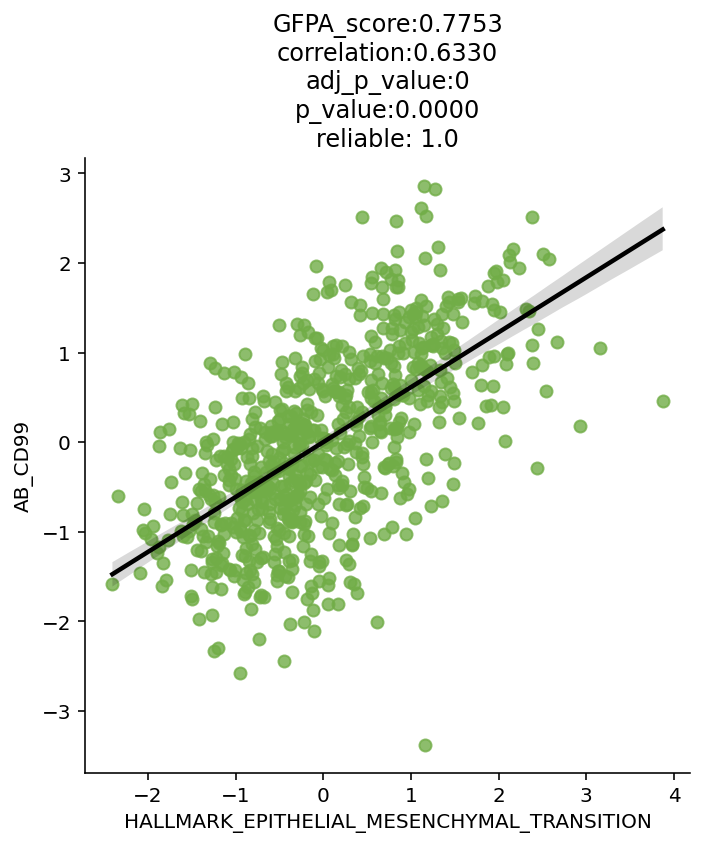

In [12]:
geneset_name = "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"
protein_name = "AB_CD99"
gfpa.pl.scatter(pbmc_cd4, geneset_name, protein_name, scatter_kws={'color': '#71AD47'}, line_kws={'color': 'black'})

You can view the relationship between each gene and protein in the gene set. The higher the weight, the stronger the relationship between genes and proteins.

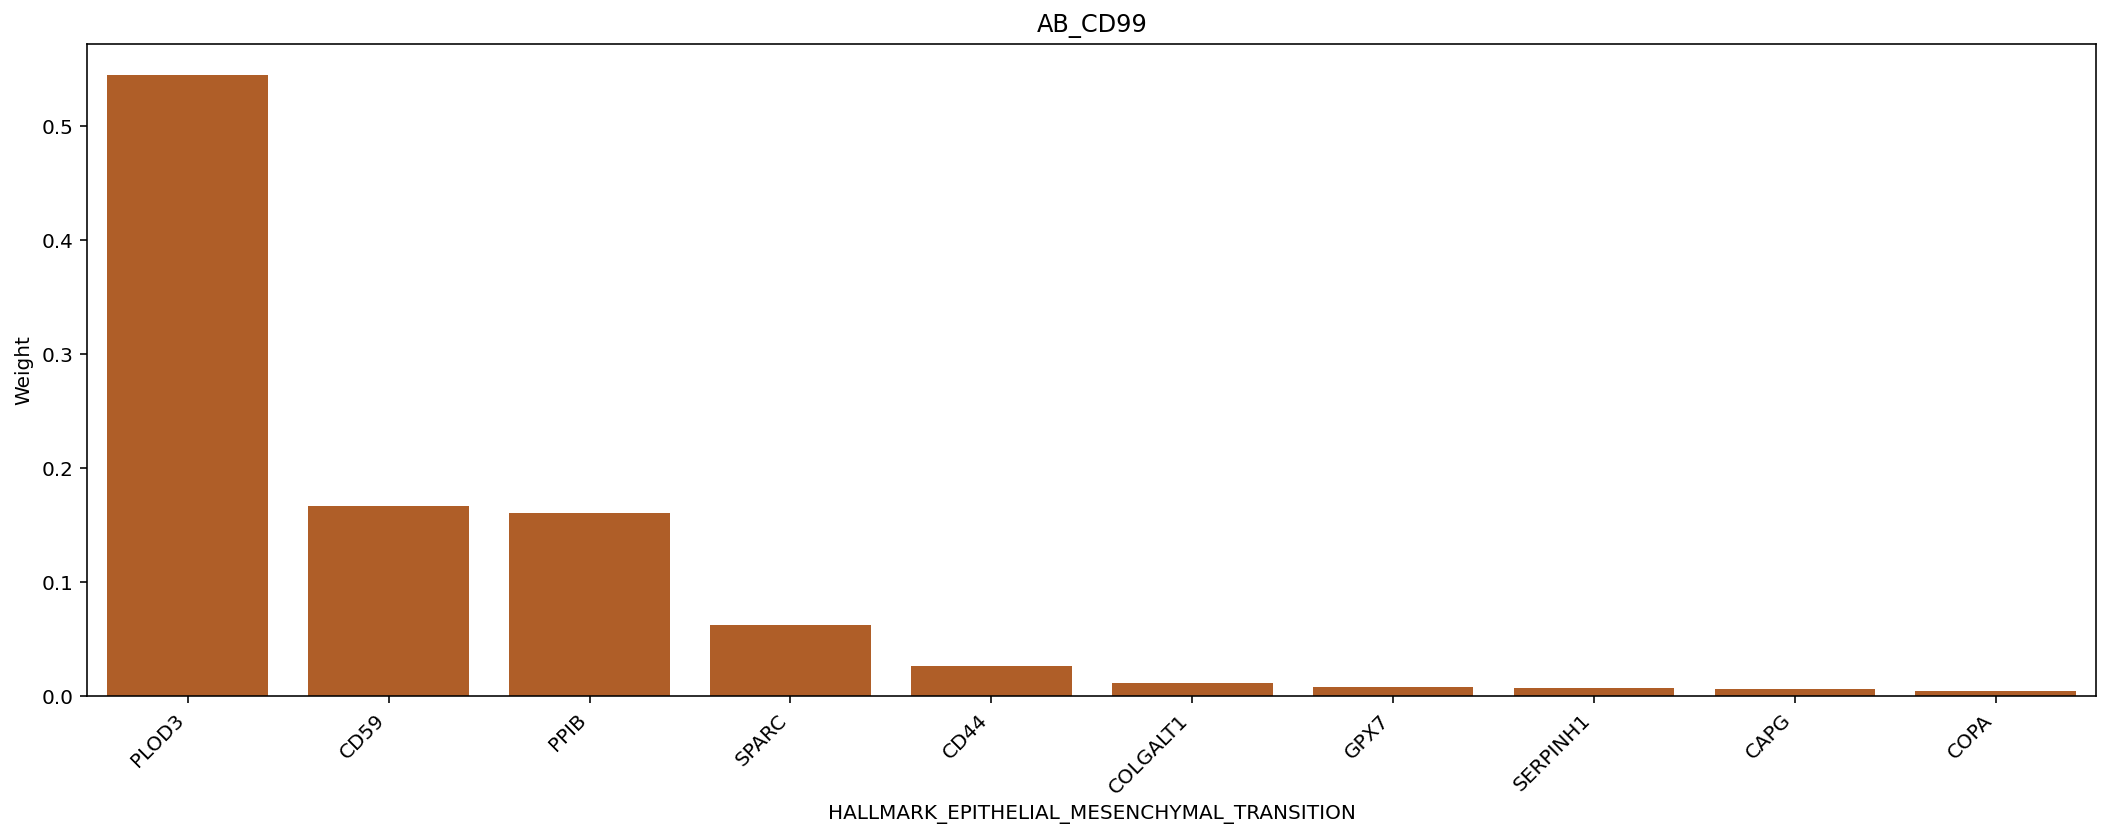

In [13]:
plt.figure(figsize = (18,6))
plt.rcParams.update({'font.size': 10})

geneset_name = "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"
protein_name = "AB_CD99"
gfpa.pl.weight(pbmc_cd4, geneset_name, protein_name, model="rf", color="#C55A12")

In [14]:
gfpa.tb.weight(pbmc_cd4, geneset_name, protein_name, model="rf")

,Gene,Protein,Weight
0,SERPINE1,AB_CD99,0.000000
1,VCAN,AB_CD99,0.000000
2,IGFBP3,AB_CD99,0.000000
3,TGFBI,AB_CD99,0.000000
4,SPARC,AB_CD99,0.062518
...,...,...,...
78,PVR,AB_CD99,0.000000
79,NOTCH2,AB_CD99,0.000000
80,COLGALT1,AB_CD99,0.011097
81,GPX7,AB_CD99,0.007491


In [15]:
pbmc_cd4.uns["gfpa"].to_csv("temp.csv")

In [16]:
pbmc_cd4.obsm

AxisArrays with keys: X_pca, X_pca_harmony, X_umap, protein_expression, protein_normalization, geneset